In [1]:
import data_functions as dat
import filter_functions as fil
import fitting_functions as fit
from math_functions import normalise, OD_calc
from plotting_functions import plot_scope
from scipy.integrate import simpson

import numpy as np

import os

In [2]:
directory = r"C:\Users\keena\Downloads\TPA"
folder = "2301_lock_HP"

dir = os.path.join(directory, folder)

exts = ('.csv')
excs = ['.png', 'avg']
refs_995 = ['995_solo']
refs_1550 = ['1550_solo']
refs = refs_995 + refs_1550
# polarisation for maximum and minimum absorption of both 1550 and 995 pulses
polarisation_1550 = ['230', '280']
polarisation_995 = ['40', '85']

In [3]:
# interogate directory to extract folder and file names
folder_list, file_list = dat.dir_interogate(path=dir, extensions=exts, exceptions=excs)
# create dictionary for indexing folders and files
fol_i = dat.make_index_dict(folder_list)
fil_i = [dat.make_index_dict(file_sub_list) for file_sub_list in file_list]
# assemble reference paths
ref_995_path = dat.search_paths(folder_list, file_list, include=refs_995)
ref_1550_path = dat.search_paths(folder_list, file_list, include=refs_1550)
ref_995_path_list = [os.path.join(dir, x) for x in ref_995_path]
ref_1550_path_list = [os.path.join(dir, x) for x in ref_1550_path]
# find polarisation numbers from reference file names
polarisations_995 = [dat.find_numbers(os.path.split(path)[1], '\d+') for path in ref_995_path]
polarisations_1550 = [dat.find_numbers(os.path.split(path)[1], '\d+') for path in ref_1550_path]
# extract excel data from the folders
data_path_list = dat.search_paths(folder_list, file_list, [exts[0]])
excel_sets = [[dat.open_excel(os.path.join(dir, data_path)) for data_path in data_paths] for data_paths in data_path_list]

In [4]:
# create dictionary for index of channel data
i = {'time': 0,
     'sp_trans': 1,
     'sp_ref': 2,
     'cp_trans': 3,
     'cp_ref': 4}
# make labels for the plots of said data
labels = {key:i[key] for key in i.keys() if key != 'time'}

In [5]:
# find index of the polarisation values
tpa_pol_1550 = [value for pol in polarisation_1550 for (key, value) in fol_i.items() if pol in key]
tpa_pol_995 = [value for pol in polarisation_995 for (key, value) in fol_i.items() if pol in key]
ref_pol_1550 = [value for pol in polarisation_1550 for (key, value) in fil_i[fol_i['1550_solo']].items() if pol in key]
ref_pol_995 = [value for pol in polarisation_995 for (key, value) in fil_i[fol_i['995_solo']].items() if pol in key]
# create dictionary for index of polarisation max / min - sp is for the folder index, rsp, rcp are for file indexing
p_i = {'max_sp': tpa_pol_1550[0],
       'min_sp': tpa_pol_1550[1],
       'max_rsp': ref_pol_1550[0],
       'min_rsp': ref_pol_1550[1],
       'max_rcp': ref_pol_995[0],
       'min_rcp': ref_pol_995[1]}

1550_solo


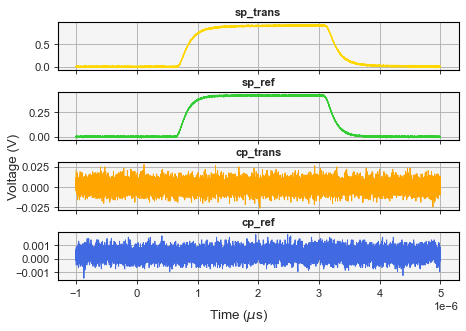

In [6]:
# plot 1550 reference data to check assignment
x = '1550_solo'
fol = fol_i[x]
fig, ax = plot_scope(excel_sets[fol][0][:,i['time']], [excel_sets[fol][0][:,i['sp_trans']], excel_sets[fol][0][:,i['sp_ref']], excel_sets[fol][0][:,i['cp_trans']], excel_sets[fol][0][:,i['cp_ref']]], titles=labels, multi=True)
print(x)

995_solo


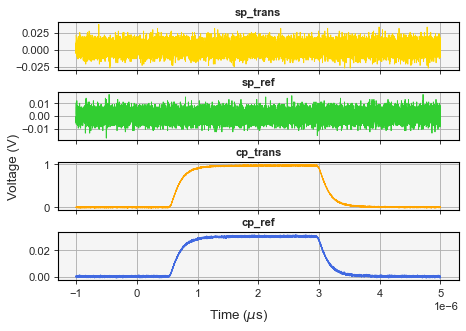

In [7]:
# plot 1550 reference data to check assignment
x = '995_solo'
fol = fol_i[x]
fig, ax = plot_scope(excel_sets[fol][0][:,i['time']], [excel_sets[fol][0][:,i['sp_trans']], excel_sets[fol][0][:,i['sp_ref']], excel_sets[fol][0][:,i['cp_trans']], excel_sets[fol][0][:,i['cp_ref']]], titles=labels, multi=True)
print(x)

1550_HWP_230


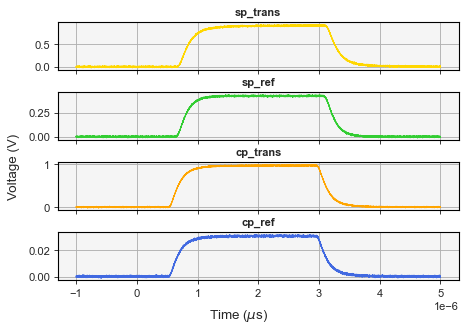

In [8]:
# plot 1550 reference data to check assignment
x = '1550_HWP_230'
fol = fol_i[x]
fig, ax = plot_scope(excel_sets[fol][0][:,i['time']], [excel_sets[fol][0][:,i['sp_trans']], excel_sets[fol][0][:,i['sp_ref']], excel_sets[fol][0][:,i['cp_trans']], excel_sets[fol][0][:,i['cp_ref']]], titles=labels, multi=True)
print(x)

1550_HWP_280


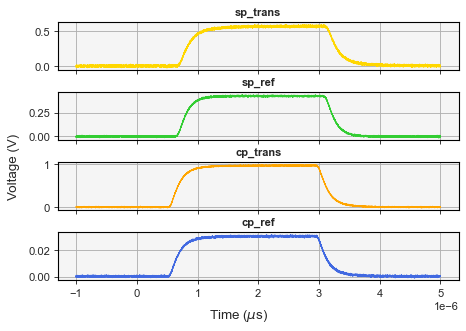

In [9]:
# plot 1550 reference data to check assignment
x = '1550_HWP_280'
fol = fol_i[x]
fig, ax = plot_scope(excel_sets[fol][0][:,i['time']], [excel_sets[fol][0][:,i['sp_trans']], excel_sets[fol][0][:,i['sp_ref']], excel_sets[fol][0][:,i['cp_trans']], excel_sets[fol][0][:,i['cp_ref']]], titles=labels, multi=True)
print(x)

In [10]:
fol_i

{'995_solo': 0, '1550_HWP_230': 1, '1550_HWP_280': 2, '1550_solo': 3}

In [11]:
fil_i

[{'HWP_40.csv': 0, 'HWP_85.csv': 1},
 {'HWP_40.csv': 0, 'HWP_85.csv': 1},
 {'HWP_40.csv': 0, 'HWP_85.csv': 1},
 {'HWP_230.csv': 0, 'HWP_280.csv': 1}]

In [12]:
test = normalise(excel_sets[p_i['max_sp']][fil_i[]][i[]])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3903046876.py, line 1)

In [13]:
# find area for pulses when max absorption of signal and control pulses
sp_area = simpson(y=excel_sets[p_i['max_sp']][p_i['max_rcp']][0:,i['sp_trans']], x=excel_sets[p_i['max_sp']][p_i['max_rcp']][0:,i['time']])
sp_ref_area = simpson(y=excel_sets[p_i['max_sp']][p_i['max_rcp']][0:,i['sp_ref']], x=excel_sets[p_i['max_sp']][p_i['max_rcp']][0:,i['time']])

In [14]:
sp_area, sp_ref_area

(2.251212434395867e-06, 1.0273004315738401e-06)